In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Fit the scaler to the market data and transform the data
scaled_market_data = scaler.fit_transform(market_data_df)


In [10]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_market_data, columns=scaled_market_data_df.columns,)

# Copy the crypto names from the original data
scaled_market_data_df.index = market_data_df.index

# Set the coinid column as index

# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Create a list with the number of k-values to try
# Use a range from 1 to 11
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import pandas as pd
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_market_data_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


####Add Ignore Warnings

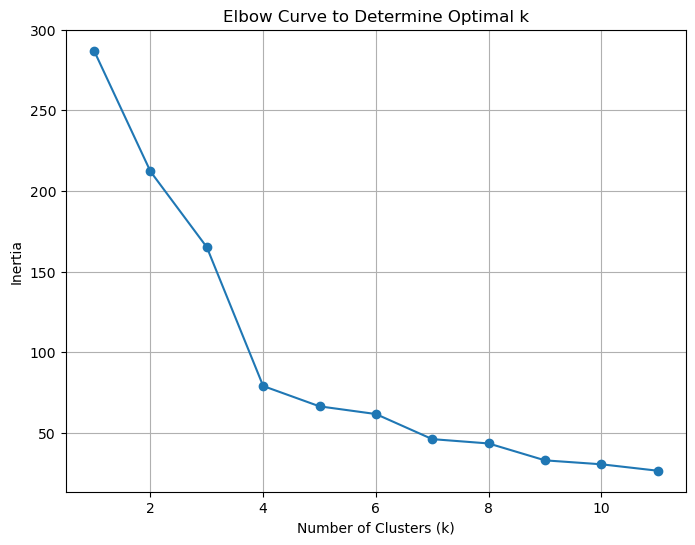

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal k')
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 clusters are the best value for 'k'.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [14]:
# Initialize the K-Means model using the best value for k
best_k_value = 4

kmeans_model = KMeans(n_clusters=best_k_value, random_state=1)

In [15]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_market_data_df)

KMeans(n_clusters=4, random_state=1)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans_model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [23]:
# Create a copy of the DataFrame
crypto_market_data_clusters_df = scaled_market_data_df.copy()

In [24]:
# Add the predicted clusters to the DataFrame
crypto_market_data_clusters_df["crypto_cluster"] = crypto_clusters

# Display sample data
crypto_market_data_clusters_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

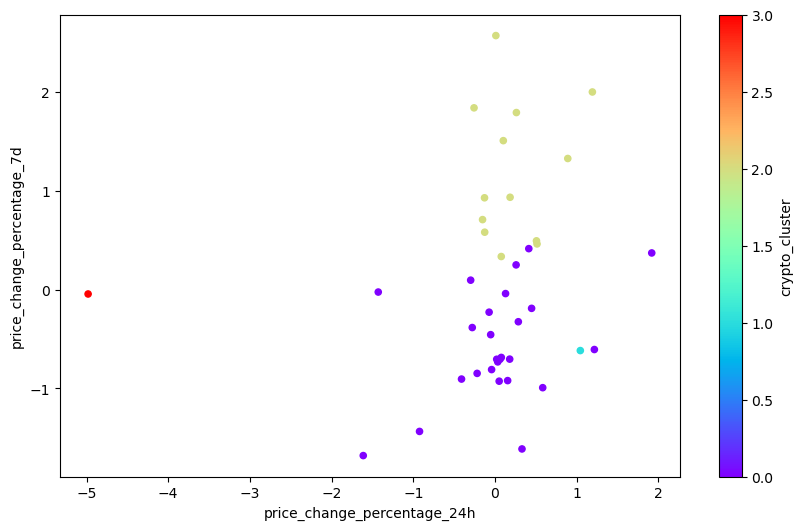

In [25]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_market_data_clusters_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow",
    colorbar=True,
    figsize=(10,6)
)

### Optimize Clusters with Principal Component Analysis.

In [26]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [27]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_market_data_df)

# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=scaled_market_data_df.index)

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [28]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

#display
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166, The total explained variance is about 89.5% of the variance in the original data. 

In [29]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_market_data_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
pca_market_data_df.index = market_data_df.index

# Set the coinid column as index

# Display sample data
pca_market_data_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [30]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import pandas as pd
k_values_pca = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=1)
    kmeans_pca.fit(pca_market_data_df)
    inertia_pca.append(kmeans_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


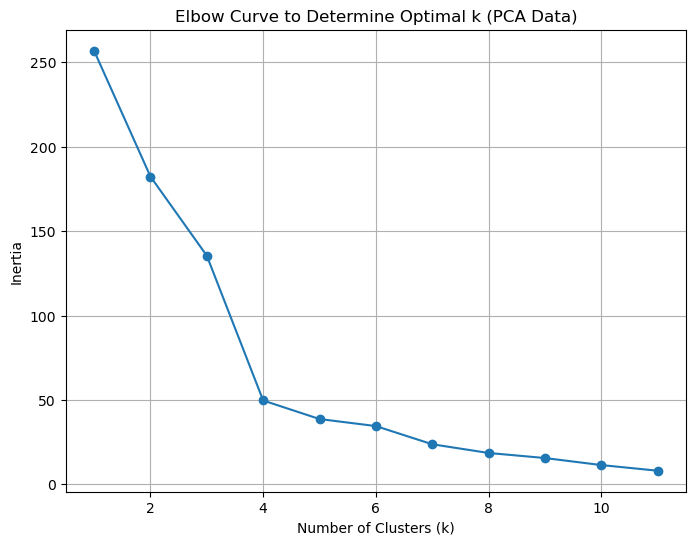

In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8,6))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal k (PCA Data)')
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 Clusters is the best value for 'k' with PCA Data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, botht the PCA and Original data '4' was the best value for 'k'.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialize the K-Means model using the best value for k
best_k_value_pca = 4
kmeans_pca_model = KMeans(n_clusters=best_k_value_pca, random_state=1)

In [33]:
# Fit the K-Means model using the PCA data
kmeans_pca_model.fit(pca_market_data_df)

KMeans(n_clusters=4, random_state=1)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_crypto_clusters = kmeans_pca_model.predict(pca_market_data_df)

# Print the resulting array of cluster values.
pca_crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [35]:
# Create a copy of the DataFrame with the PCA data
pca_crypto_market_data_clusters_df = pca_market_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_crypto_market_data_clusters_df["crypto_cluster"] = pca_crypto_clusters

# Display sample data
pca_crypto_market_data_clusters_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [37]:

import hvplot.pandas
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

pca_crypto_market_data_clusters_df.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    c="crypto_cluster", 
    colormap="rainbow", 
    colorbar=True, 
    title="Cryptocurrency Clustering using PCA",
    xlabel="PCA1",
    ylabel="PCA2",
    width=700, 
    height=500,
    legend="right"
)


:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [38]:
# Use the columns from the original scaled DataFrame as the index.
feature_weights_df = pd.DataFrame(pca.components_, columns=scaled_market_data_df.columns, index=["PCA1", "PCA2", "PCA3"])

# Display
feature_weights_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PCA1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PCA2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PCA3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

For PCA1:

Strongest Positive Influence: price_change_percentage_200d (0.594468) and price_change_percentage_1y (0.568379) have the strongest positive influence on PCA1.
Strongest Negative Influence: price_change_percentage_24h (-0.416728) has the strongest negative influence on PCA1.

For PCA2:

Strongest Positive Influence: price_change_percentage_14d (0.540415) and price_change_percentage_30d (0.562182) have the strongest positive influence on PCA2.
Strongest Negative Influence: price_change_percentage_1y (-0.150789) has the strongest negative influence on PCA2.

For PCA3:

Strongest Positive Influence: price_change_percentage_7d (0.787670) has the strongest positive influence on PCA3.
Strongest Negative Influence: price_change_percentage_60d (-0.361377) has the strongest negative influence on PCA3.
    